# 6. SEABORN Fundamentals

- Lineplot
- barplot
- countplot
- 

In [323]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [324]:
print(dir(sns),end='')

['FacetGrid', 'JointGrid', 'PairGrid', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_orig_rc_params', 'algorithms', 'axes_style', 'axisgrid', 'barplot', 'blend_palette', 'boxenplot', 'boxplot', 'categorical', 'catplot', 'choose_colorbrewer_palette', 'choose_cubehelix_palette', 'choose_dark_palette', 'choose_diverging_palette', 'choose_light_palette', 'clustermap', 'cm', 'color_palette', 'colors', 'countplot', 'crayon_palette', 'crayons', 'cubehelix_palette', 'dark_palette', 'desaturate', 'despine', 'distplot', 'distributions', 'diverging_palette', 'dogplot', 'external', 'factorplot', 'get_dataset_names', 'heatmap', 'hls_palette', 'husl_palette', 'jointplot', 'kdeplot', 'light_palette', 'lineplot', 'lmplot', 'load_dataset', 'lvplot', 'matrix', 'miscplot', 'mpl', 'mpl_palette', 'pairplot', 'palettes', 'palplot', 'plotting_context', 'pointplot', 'rcmod', 'regplot', 'regression', 'relational', 'relplot

----- Creating DF -----

In [325]:
# Creating rows

Expenses = []
Year = []
Month = []
Exp_cat = []
Month_library = ['January','February','March','April','May','June','July',
                 'August','September','October','November','December']
Exp_cat_library = ['Fixed Expenses','Personal Expense','Work Expense','Emergencies']
for number in range(20):
    Expenses.append(random.randint(10,500))
    Year.append(random.randint(2018,2020))
    Month.append(Month_library[random.randint(0,11)])
    Exp_cat.append(Exp_cat_library[random.randint(0,3)])

# Creating column names and assigning data 
data = {'Month':Month,'Year':Year,'Exp_cat':Exp_cat,'Expenses':Expenses}

df['Month'] = pd.Categorical(df['Month'], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
                                           'September', 'October','November', 'December'])

# Create dataframe
df = pd.DataFrame(data=data)


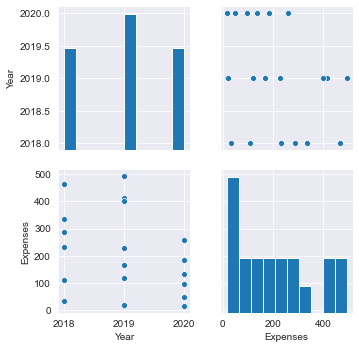

In [326]:
sns.set_style('darkgrid')
sns.pairplot(df, palette='Set2')

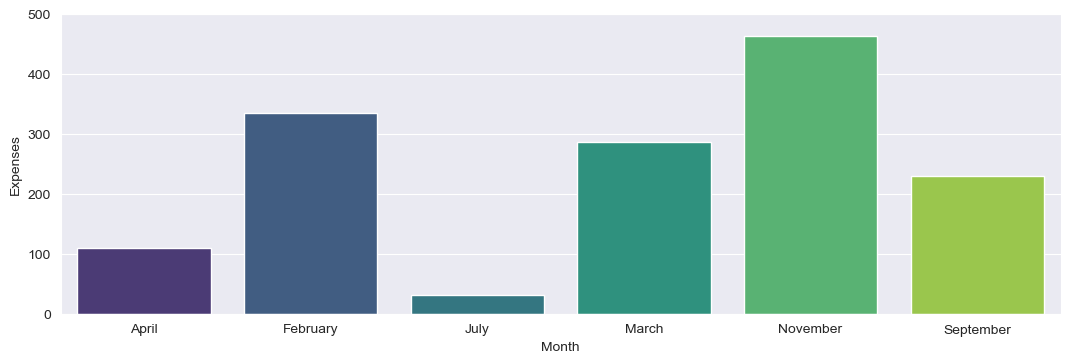

In [327]:
fig = plt.figure(figsize=(10,3),dpi=100)
axes = fig.add_axes([1,1,1,1])
axes.set_ylim([0,500])
sns.axes_style({axes.grid:True})
sns.barplot(data=df[(df['Year'] == 2018)].groupby(['Year','Month']).sum().reset_index(),x='Month',y='Expenses',palette='viridis')

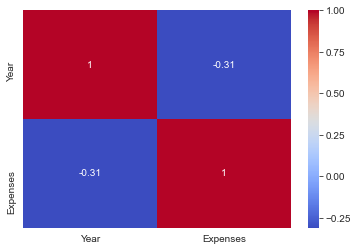

In [328]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

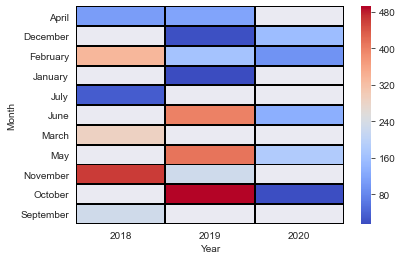

In [329]:
sns.heatmap(df.pivot_table(values='Expenses',index='Month',columns='Year'),cmap='coolwarm',linewidth=1,linecolor='black')

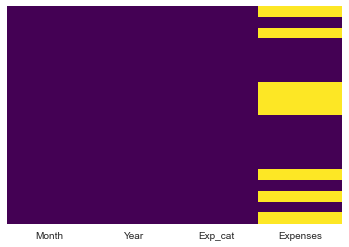

In [330]:
df.loc[(df['Year'] == 2019),'Expenses'] = np.nan

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [331]:
sns.heatmap

<function seaborn.matrix.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)>

In [332]:
sns.lmplot

<function seaborn.regression.lmplot(x, y, data, hue=None, col=None, row=None, palette=None, col_wrap=None, height=5, aspect=1, markers='o', sharex=True, sharey=True, hue_order=None, col_order=None, row_order=None, legend=True, legend_out=True, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=False, x_jitter=None, y_jitter=None, scatter_kws=None, line_kws=None, size=None)>

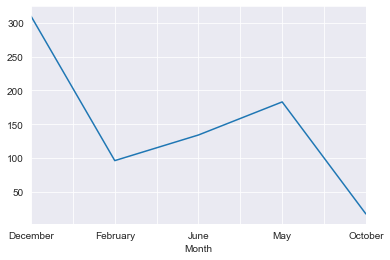

In [333]:
df[(df['Year'] == 2020)].groupby('Month')['Expenses'].sum().plot.line(x='Month',y='Expenses')

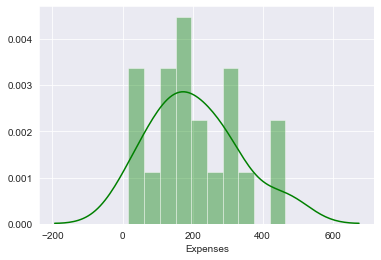

In [334]:
df['Expenses'] = df['Expenses'].interpolate()
df.loc[0,'Expenses'] = 300
df['Expenses']
sns.distplot(df['Expenses'],kde=True,bins=10,color='Green')

In [335]:
# month_map = {
#     'January':1,
#     'February':2,
#     'March':3,
#     'April':4,
#     'May':5,
#     'June':5,
#     'July':7,
#     'August':8,
#     'September':9,
#     'October':10,
#     'November':11,
#     'December':12   
# }
# df['Month_number'] = df['Month'].replace(month_map)

In [336]:
import datetime

In [337]:
help(datetime.datetime)

Help on class datetime in module datetime:

class datetime(date)
 |  datetime(year, month, day[, hour[, minute[, second[, microsecond[,tzinfo]]]]])
 |  
 |  The year, month and day arguments are required. tzinfo may be None, or an
 |  instance of a tzinfo subclass. The remaining arguments may be ints.
 |  
 |  Method resolution order:
 |      datetime
 |      date
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |      Return hash(self).
 |  
 |  __le__(self, value, /)
 |      Return self<=value.
 |  
 |  __lt__(self, value, /)
 |      Return self<value.
 |  
 |  __ne__(self, value, /)
 |      Return self!=value.
 |  
 |  __radd__(self, value

In [338]:
test = df.loc[10,'Month']
time_object = datetime.datetime.strptime(test,'%B')
time_object.month

2

In [339]:
df['Month_number'] = df['Month'].apply(lambda x: datetime.datetime.strptime(x,'%B').month)
df.head(3)

,Month,Year,Exp_cat,Expenses,Month_number
0,February,2019,Emergencies,300.0,2
1,December,2020,Personal Expense,50.0,12
2,October,2019,Personal Expense,169.0,10


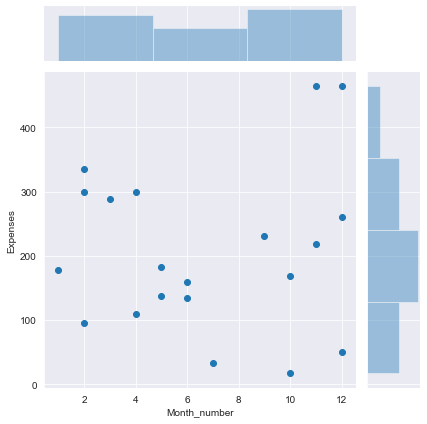

In [340]:
sns.jointplot(x='Month_number',y='Expenses',data=df)